# Data Analysis for Business

## Table of Contents
1. [Introduction](#1.-Introduction)
*******


2. [Methods](#2.-Methods)

      2.1 [Regression Model.](#2.1-Regression-Model.)   
      2.2 [Classification Model.](#2.2-Classification-Model.)   
      2.3 [Added Value.](#2.3-Added-Value.)
   
************   
3. [Background](#3.-Background)
*************
 
 
4. [Exploration of Data](#4.Exploration-of-Data)
************
   
   
5. [Data Cleaning](#5.Data-Cleaning)
*************


6. [Statistics Descriptiong](#6.Statistics-Description)

      6.1 [Dataset Distributions and Detecting Outliers](#6.1-Dataset-Distributions-and-Detecting-Outliers)      
      6.2 [Removing the Outliers](#6.2-Removing-the-Outliers)      
      6.3 [Correlation Matrix](#6.3-Correlation-Matrix)
      
***********      
7. [Regression Model](#7.Regression-Model)
   
      7.1 [First Stage](#7.1-First-Stage)      
      7.2 [Scond Stage](#7.2-Scond-Stage)     
      7.3 [Third Stage](#7.3-Third-Stage)      
      7.4 [Conclusion for the Regression Model](#7.4-Conclusion-for-the-Regression-Model:)
      
************      
8. [Classification Model](#8.Classification-Model.)   

   8.1 [Bayesian Classification](#8.1-Bayesian-Classification)    
      8.1.1 [Data Cleaning](#8.1.1-Data-Cleaning:)   
      8.1.2 [Data Preprocessing](#8.1.2-Data-Preprocessing:)  
      8.1.3 [Bayesian Prediction](#8.1.3-Bayesian-Prediction:)  
      8.1.4 [Interpretation of Bayesian prediction results](#8.1.4-Interpretation-of-Bayesian-prediction-results:)  
                   
   8.2 [Confusion Matrix](#8.2-Confusion-Matrix)      
      8.2.1 [Interpretation of Confusion Matrix Results](#8.2.1-Interpretation-of-Confusion-Matrix-Results:) 

**********
9. [Comparison Algorithm:](#9.-Comparison-Algorithm:)

   9.1 [Conclusion for Classification Model](#9.1-Conclusion-for-Classification-Model:) 

**********
10. [Conclusion](#10.Conclusion)

*********
11. [Reference](#11.Reference)


***********

### My dataset can be found here:
https://www.kaggle.com/datasets/rhuebner/human-resources-data-set
************

# 1. Introduction

Organizations have access to an incredible amount of data, which is a valuable tool. It has the capacity to influence decision-making, design strategies, and enhance organizational performance when properly leveraged.The technique of evaluating data to answer questions, detect trends, and extract insights is known as data analytics. When data analytics is utilized in business, it is commonly referred to as business analytics (Catherine, 2021).
* **4 ESSENTIAL DATA ANALYSIS TYPES**

**1- Descriptive Analytics:** It enables you to quickly summarize what occurred or is happening by drawing trends from the raw data.

**2- Diagnostic Analytics:** The subsequent logical inquiry, "Why did this happen?" is answered by diagnostic analytics.

**3- Predictive Analytics:** In order to anticipate future trends or occurrences or to provide a response to the question "What could happen in the future?".

**4- Prescriptive Analytics:** finally provides a response to the query, "What should we do next?"

The aim of this project is to create a *regression* model employing *Diagnostic Analytics* approaches based on the data analysis category. In addition, we aim to create a *Bayesian classification* model that can be used for both *diagnostic and predictive analytics*. Based on the specified parameters, this model will examine trends and features influencing employees likely to quit.
*********************** 





# 2. Methods

###  - What business decision do you want to support with this solution, and how do you expect your answer to add value?

 The HR data set offers useful insights about a company's personnel, including personal and employment information as well as performance indicators. This data analysis project's primary goal is to assist a business decision via the development of two models that can predict employee performance ratings and the possibility of termination. Regression and Cluster Algorithm techniques have been used to accomplish the purpose.   

## 2.1 Regression Model.

The relationship between the dependent variable **(performance score)** and a number of independent variables **(salary, department, engagement survey results, absences, employee satisfaction, and days late to work in the previous 30 days)** has been modeled using the regression model, specifically the Ordinary Least Squares (OLS) method.

## 2.2 Classification Model.

In the meanwhile, the Bayesian classification model has been used to assess trends and characteristics that may affect an employee's **likelihood to quit** the organization. The model's predictors include **engagement survey results, employee satisfaction, days late to work in the last 30 days, and absenteeism**.

## 2.3 Added Value.

The study intends to provide insight into the variables that affect employee performance and to suggest prospective measures to mitigate it. The research attempts to assist the business in making data-driven decisions to enhance employee retention, lower recruiting costs, and eventually raise overall organizational performance by identifying variables that have an influence on employee termination.
***********

# 3. Background

### - Why did you choose this as your preferred data-driven decision-making problem? 

As someone with a background in human resources, I understand the vital role that employee performance plays in an organization's success. As a result, I selected this HR data set as my favourite data-driven decision-making challenge. I can uncover elements that lead to great employee performance and give insights to assist the organization make intelligent decisions that promote employee retention and customer satisfaction by evaluating the data. The data collection gives a complete view of employee information, including personal information, job details, and performance measures, allowing me to investigate numerous aspects that impact the performance of employees. The use of data-driven decision-making processes in HR could potentially increase employee performance and, as a result, the company's productivity and profit.
************


# 4.Exploration of Data

<h3>Import packages:

These packages will provide a solid foundation for data manipulation, analysis, and visualization.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

I've imported the HR dataset from the "HRDataset.csv" file using this line of code and saved it as a pandas DataFrame object named "HR_data_set" in my notebook. Using this DataFrame object, I can now begin exploring the data and carrying out my data analysis tasks.

In [3]:
HR_data_set=pd.read_csv('HRDataset.csv')


the first five rows of the HR_data_set data frame, which offer a brief summary of the dataset. This function aids in determining whether or not the dataset was successfully loaded, as well as providing an indication of how the dataset appears.

In [4]:
HR_data_set.head()

,Employee_Name,EmpID,MaritalDesc,Sex,EmploymentStatus,Department,Position,DateofHire,PerformanceScore,Salary,...,TermReason,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Termination
0,"King, Janet",10089,Married,F,Active,Executive Office,President & CEO,7/2/2012,Fully Meets,250000,...,N/A-StillEmployed,Board of Directors,Indeed,4.83,3,0,1/17/2019,0,10,0
1,"Zamora, Jennifer",10010,Single,F,Active,IT/IS,CIO,4/10/2010,Exceeds,220450,...,N/A-StillEmployed,Janet King,Employee Referral,4.60,5,6,2/21/2019,0,16,0
2,"Houlihan, Debra",10272,Married,F,Active,Sales,Director of Sales,5/5/2014,Fully Meets,180000,...,N/A-StillEmployed,Janet King,LinkedIn,4.50,4,0,1/21/2019,0,19,0
3,"Foss, Jason",10015,Single,M,Active,IT/IS,IT Director,4/15/2011,Exceeds,178000,...,N/A-StillEmployed,Jennifer Zamora,Indeed,5.00,5,5,1/7/2019,0,15,0
4,"Corleone, Vito",10019,Single,M,Active,Production,Director of Operations,1/5/2009,Exceeds,170500,...,N/A-StillEmployed,Janet King,Indeed,3.70,5,0,2/4/2019,0,15,0


By running HR_data_set.info() in Python, we can quickly discover missing data by counting the non-null values in each column. Before analyzing the dataset, this helps us understand its structure and content.

In [5]:
HR_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MaritalDesc                 311 non-null    object 
 3   Sex                         311 non-null    object 
 4   EmploymentStatus            311 non-null    object 
 5   Department                  311 non-null    object 
 6   Position                    311 non-null    object 
 7   DateofHire                  311 non-null    object 
 8   PerformanceScore            311 non-null    object 
 9   Salary                      311 non-null    int64  
 10  DateofTermination           104 non-null    object 
 11  TermReason                  311 non-null    object 
 12  ManagerName                 311 non-null    object 
 13  RecruitmentSource           311 non

The pandas library's pd.to_datetime() method transforms the HR_data_set dataframe's "LastPerformanceReview_Date" field from text to datetime. This lets us utilize dates as datetime objects for time series analysis and date filtering.

In [6]:
HR_data_set['LastPerformanceReview_Date'] = pd.to_datetime(HR_data_set['LastPerformanceReview_Date'])

This code returns the HR_data_set dataframe's missing values per column. We may count missing values in each column by using the data frame's isnull() function and chaining the sum() method. This helps discover columns that need data cleaning or imputation.

In [7]:
HR_data_set.isnull().sum()

Employee_Name                   0
EmpID                           0
MaritalDesc                     0
Sex                             0
EmploymentStatus                0
Department                      0
Position                        0
DateofHire                      0
PerformanceScore                0
Salary                          0
DateofTermination             207
TermReason                      0
ManagerName                     0
RecruitmentSource               0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
Absences                        0
Termination                     0
dtype: int64

**********
# 5.Data Cleaning

"DateofTermination" has 207 missing values. This means 207 individuals are still working at the firm without a termination date. Missing data may greatly affect our studies and projections. Before analyzing these missing variables, we must choose a strategy. These rows may be deleted or imputed.

In [8]:
HR_data_set.drop(columns=["DateofTermination"], inplace=True)

"HR_data_set.drop(columns=["DateofTermination"], inplace=True)" deletes the column. This column held employee termination dates, but 207 missing data could not be imputed, therefore it was removed.

In [9]:
HR_data_set.isnull().sum()

Employee_Name                 0
EmpID                         0
MaritalDesc                   0
Sex                           0
EmploymentStatus              0
Department                    0
Position                      0
DateofHire                    0
PerformanceScore              0
Salary                        0
TermReason                    0
ManagerName                   0
RecruitmentSource             0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
Termination                   0
dtype: int64

In [10]:
HR_data_set.shape

(311, 20)

These codes add extra columns to the HR_data_set data frame in order to transform category variables to numerical ones, which is a standard machine learning preparation ste.
*These new numerical columns can now be used for analysis and modeling purposes.*

In [11]:
HR_data_set["DepartmentID"] = np.where((HR_data_set["Department"] == "Admin Offices"), 1,
                                       np.where((HR_data_set["Department"] == "Executive Office"), 2,
                                                np.where((HR_data_set["Department"] == "IT/IS"), 3,
                                                         np.where((HR_data_set["Department"] == "Production"), 4,
                                                                  np.where((HR_data_set["Department"] == "Sales"), 5, 6)))))

HR_data_set["SexID"] = np.where((HR_data_set["Sex"] == "M"), 1, 0)

HR_data_set["MaritalID"] = np.where((HR_data_set["MaritalDesc"] == "Single"), 1,
                                       np.where((HR_data_set["MaritalDesc"] == "Married"), 2,
                                                np.where((HR_data_set["MaritalDesc"] == "Divorced"), 3,
                                                         np.where((HR_data_set["MaritalDesc"] == "Widowed"), 4, 5))))

HR_data_set["EmploymentID"] = np.where((HR_data_set["EmploymentStatus"] == "Active"), 1,
                                       np.where((HR_data_set["EmploymentStatus"] == "Voluntarily Terminated"), 2, 3))
                                              
HR_data_set["PositionID"] = np.where(HR_data_set["Position"] == "Accountant I", 1,
                                      np.where(HR_data_set["Position"] == "Administrative Assistant", 2,
                                      np.where(HR_data_set["Position"] == "Area Sales Manager", 3,
                                      np.where(HR_data_set["Position"] == "BI Developer", 4,
                                      np.where(HR_data_set["Position"] == "BI Director", 5,
                                      np.where(HR_data_set["Position"] == "CIO", 6,
                                      np.where(HR_data_set["Position"] == "Data Analyst", 7,
                                      np.where(HR_data_set["Position"] == "Data Architect", 8,
                                      np.where(HR_data_set["Position"] == "Database Administrator", 9,
                                      np.where(HR_data_set["Position"] == "Director of Operations", 10,
                                      np.where(HR_data_set["Position"] == "Director of Sales", 11,
                                      np.where(HR_data_set["Position"] == "Enterprise Architect", 12,
                                      np.where(HR_data_set["Position"] == "IT Director", 13,
                                      np.where(HR_data_set["Position"] == "IT Manager_DB", 14,
                                      np.where(HR_data_set["Position"] == "IT Manager_Infra", 15,
                                      np.where(HR_data_set["Position"] == "IT Manager_Support", 16,
                                      np.where(HR_data_set["Position"] == "IT Support", 17,
                                      np.where(HR_data_set["Position"] == "Network Engineer", 18,
                                      np.where(HR_data_set["Position"] == "President & CEO", 19,
                                      np.where(HR_data_set["Position"] == "Principal Data Architect", 20,
                                      np.where(HR_data_set["Position"] == "Production Manager", 21,
                                      np.where(HR_data_set["Position"] == "Production Technician I", 22,
                                      np.where(HR_data_set["Position"] == "Production Technician II",23,
                                      np.where(HR_data_set["Position"] == "Sales Manager", 24,
                                      np.where(HR_data_set["Position"] == "Senior BI Developer", 25,
                                      np.where(HR_data_set["Position"] == "Shared Services Manager", 26,
                                      np.where(HR_data_set["Position"] == "Software Engineer", 27,
                                      np.where(HR_data_set["Position"] == "Software Engineering Manager", 28,
                                      np.where(HR_data_set["Position"] == "Sr_Accountant", 29,
                                      np.where(HR_data_set["Position"] == "Sr_DBA", 30,
                                      np.where(HR_data_set["Position"] == "Sr_Network Engineer", 31, 32)))))))))))))))))))))))))))))))


HR_data_set["PerformanceScoreID"] = np.where((HR_data_set["PerformanceScore"] == "Exceeds"), 4,
                                       np.where((HR_data_set["PerformanceScore"] == "Fully Meets"), 3,
                                                np.where((HR_data_set["PerformanceScore"] == "Needs Improvement"), 2, 1)))


In [12]:

HR_data_set.shape

(311, 26)

In [13]:
HR_data_set.head()

,Employee_Name,EmpID,MaritalDesc,Sex,EmploymentStatus,Department,Position,DateofHire,PerformanceScore,Salary,...,LastPerformanceReview_Date,DaysLateLast30,Absences,Termination,DepartmentID,SexID,MaritalID,EmploymentID,PositionID,PerformanceScoreID
0,"King, Janet",10089,Married,F,Active,Executive Office,President & CEO,7/2/2012,Fully Meets,250000,...,2019-01-17,0,10,0,2,0,2,1,19,3
1,"Zamora, Jennifer",10010,Single,F,Active,IT/IS,CIO,4/10/2010,Exceeds,220450,...,2019-02-21,0,16,0,3,0,1,1,6,4
2,"Houlihan, Debra",10272,Married,F,Active,Sales,Director of Sales,5/5/2014,Fully Meets,180000,...,2019-01-21,0,19,0,5,0,2,1,11,3
3,"Foss, Jason",10015,Single,M,Active,IT/IS,IT Director,4/15/2011,Exceeds,178000,...,2019-01-07,0,15,0,3,0,1,1,13,4
4,"Corleone, Vito",10019,Single,M,Active,Production,Director of Operations,1/5/2009,Exceeds,170500,...,2019-02-04,0,15,0,6,0,1,1,10,4


Using the drop technique, this code removes the original columns "Department", "Position", "PerformanceScore", "Sex", and "MaritalDesc" from the HR_data_set data frame.


After running this code, the HR_data_set data frame will only include the newly formed columns and the old columns that remain.

In [14]:

HR_data_set.drop(columns=["Department", "Position", "PerformanceScore", "Sex", "MaritalDesc"], inplace=True)


In [15]:
HR_data_set.shape

(311, 21)

In [16]:
HR_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   EmploymentStatus            311 non-null    object        
 3   DateofHire                  311 non-null    object        
 4   Salary                      311 non-null    int64         
 5   TermReason                  311 non-null    object        
 6   ManagerName                 311 non-null    object        
 7   RecruitmentSource           311 non-null    object        
 8   EngagementSurvey            311 non-null    float64       
 9   EmpSatisfaction             311 non-null    int64         
 10  SpecialProjectsCount        311 non-null    int64         
 11  LastPerformanceReview_Date  311 non-null    datetime64[ns]

*****
# 6.Statistics Description

"HR_data_set.describe()" summarizes the numerical columns in the HR dataset statistically. It offers count, mean, standard deviation, minimum, maximum, and percentiles for each numerical column. This may help detect outliers, analyze data distribution, and comprehend numerical variable core trends and fluctuations.



****** Only variables that are potential predictors in our model and are meaningful in terms of understanding the data have been interpreted. 

In [17]:
HR_data_set.describe()

,EmpID,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Termination,DepartmentID,SexID,MaritalID,EmploymentID,PositionID,PerformanceScoreID
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,69020.684887,4.110000,3.890675,1.218650,0.414791,10.237942,0.334405,5.260450,0.0,1.823151,1.385852,19.160772,2.977492
std,89.922189,25156.636930,0.789938,0.909241,2.349421,1.294519,5.852596,0.472542,1.334292,0.0,0.979258,0.583918,7.282316,0.587072
min,10001.000000,45046.000000,1.120000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
25%,10078.500000,55501.500000,3.690000,3.000000,0.000000,0.000000,5.000000,0.000000,5.000000,0.0,1.000000,1.000000,21.000000,3.000000
50%,10156.000000,62810.000000,4.280000,4.000000,0.000000,0.000000,10.000000,0.000000,6.000000,0.0,2.000000,1.000000,22.000000,3.000000
75%,10233.500000,72036.000000,4.700000,5.000000,0.000000,0.000000,15.000000,1.000000,6.000000,0.0,2.000000,2.000000,23.000000,3.000000
max,10311.000000,250000.000000,5.000000,5.000000,8.000000,6.000000,20.000000,1.000000,6.000000,0.0,5.000000,3.000000,31.000000,4.000000


* **Salary:** 

We can see that the lowest and maximum wages are considerably diverse from one another, which leads us to believe that the dataset contains some workers who have incomes that are either extremely high or unusually low.


* **EngagementSurvey:** 

This variable shows employee engagement survey scores. The survey assesses employee engagement. The average score is 4.11 out of 5, with a minimum of 1.12 and a maximum of 5.0. Scores cluster around the mean because the standard deviation is 0.79.


The results of the survey indicate that a significant proportion of the workforce exhibits a considerable level of job engagement, as per the responses provided by the participants.


* **EmpSatisfaction:** 

This variable measures each employee's degree of work satisfaction. According to the data, the average level of satisfaction is 3.89 out of 5, showing that stated levels of satisfaction are concentrated around the mean.


Based on the replies that employees gave to the satisfaction survey, it seems that the vast majority of workers feel satisfied in their current positions to a certain extent.


* **DaysLateLast30:**  

This variable shows each employee's 30-day lateness. Statistics show that the average number of days late is 0.41, ranging from 0 to 6. The standard deviation is 1.29, showing that employee punctuality varies significantly.



This suggests that most employees are generally punctual, with only a few instances of lateness.

* **Absences:** 

This variable shows each employee's absence days. The average number of absences is 10.24, and the standard deviation is 5.85, demonstrating that employee absences vary widely.



This indicates that the majority of workers have had a reasonable amount of absences; but, there are certain employees who have had an excessive quantity of absences.


* **PerformanceScoreID:**

This variable provides the performance score assigned to each employee. The score is determined by a number of elements, such as job knowledge, productivity, communication, and teamwork. The data show that the average score is 2.97, the standard deviation is 0.59, and the scores are grouped around the mean.


According to their performance scores, it seems that the vast majority of workers are achieving a satisfactory level of success in their work.

The performance score variable has a broad range of values, with some workers gaining scores as low as 1 and others receiving scores as high as 4, indicating considerable fluctuation in the quality of employee performance.



## 6.1 Dataset Distributions and Detecting Outliers

We plot histograms for all HR dataset numerical variables using the hist() tool. Histograms depict dataset distributions. Histograms show varying distributions and outliers.


Visualizing the histograms might reveal variables with many outliers. We may eliminate outliers from our analysis or replace them with the median or trim them to a specified value.


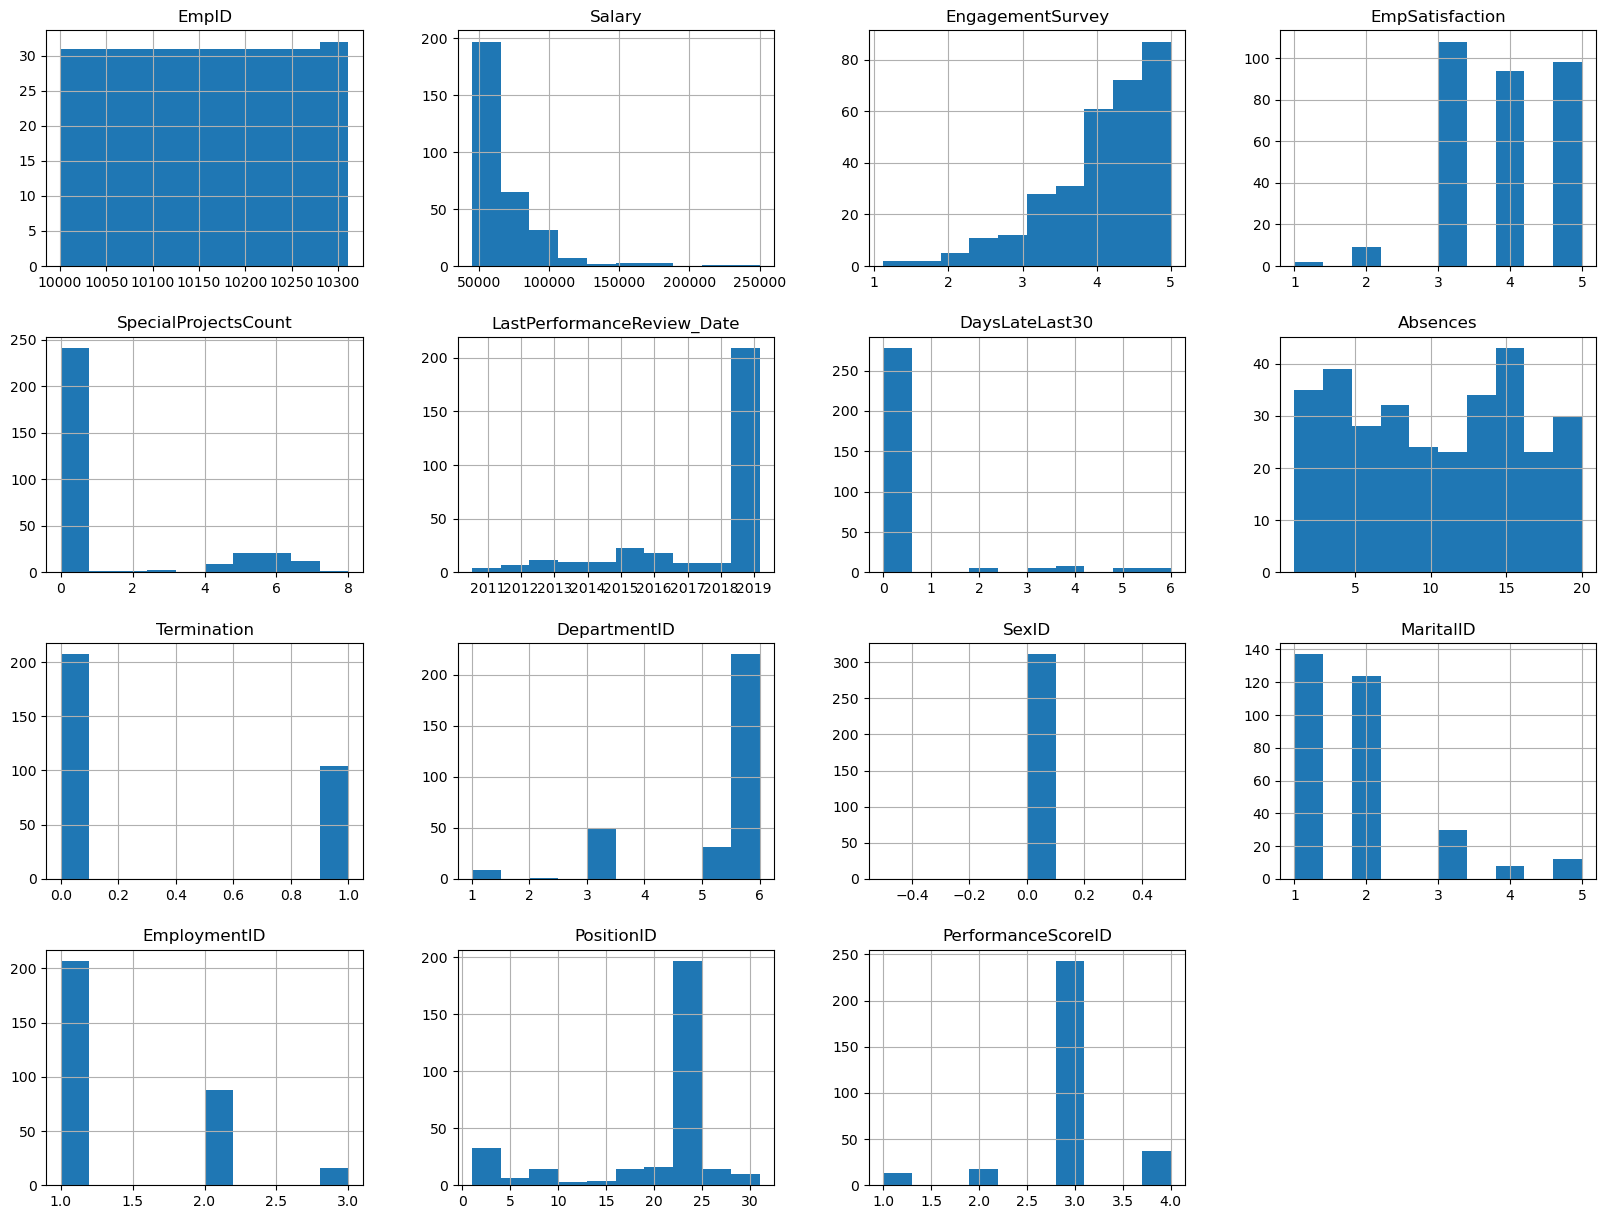

In [18]:
HR_data_set.hist(bins=10, figsize=(20, 15));

This code counts the number of outliers in the "Salary". It specifically counts how many cases of the "Salary" variable have values more than 180000, which is the threshold selected in this instance to find outliers.


Based on a threshold of 180000, 2 cells in "Salary" column contain of outliers. 

In [19]:
count = len(HR_data_set[(HR_data_set["Salary"] > 180000)])
print(count)

2


## 6.2 Removing the Outliers

The code makes a new HR_data_set by filtering away data points with "Salary" values above 180,000. Thus, it retains only data points with "Salary" values below 180,000.

In [20]:
HR_data_set = HR_data_set[HR_data_set["Salary"]<=180000]


The histogram shows the dataset's salary distribution, showing trends and insights. We can check skewness, and normality.

<AxesSubplot:>

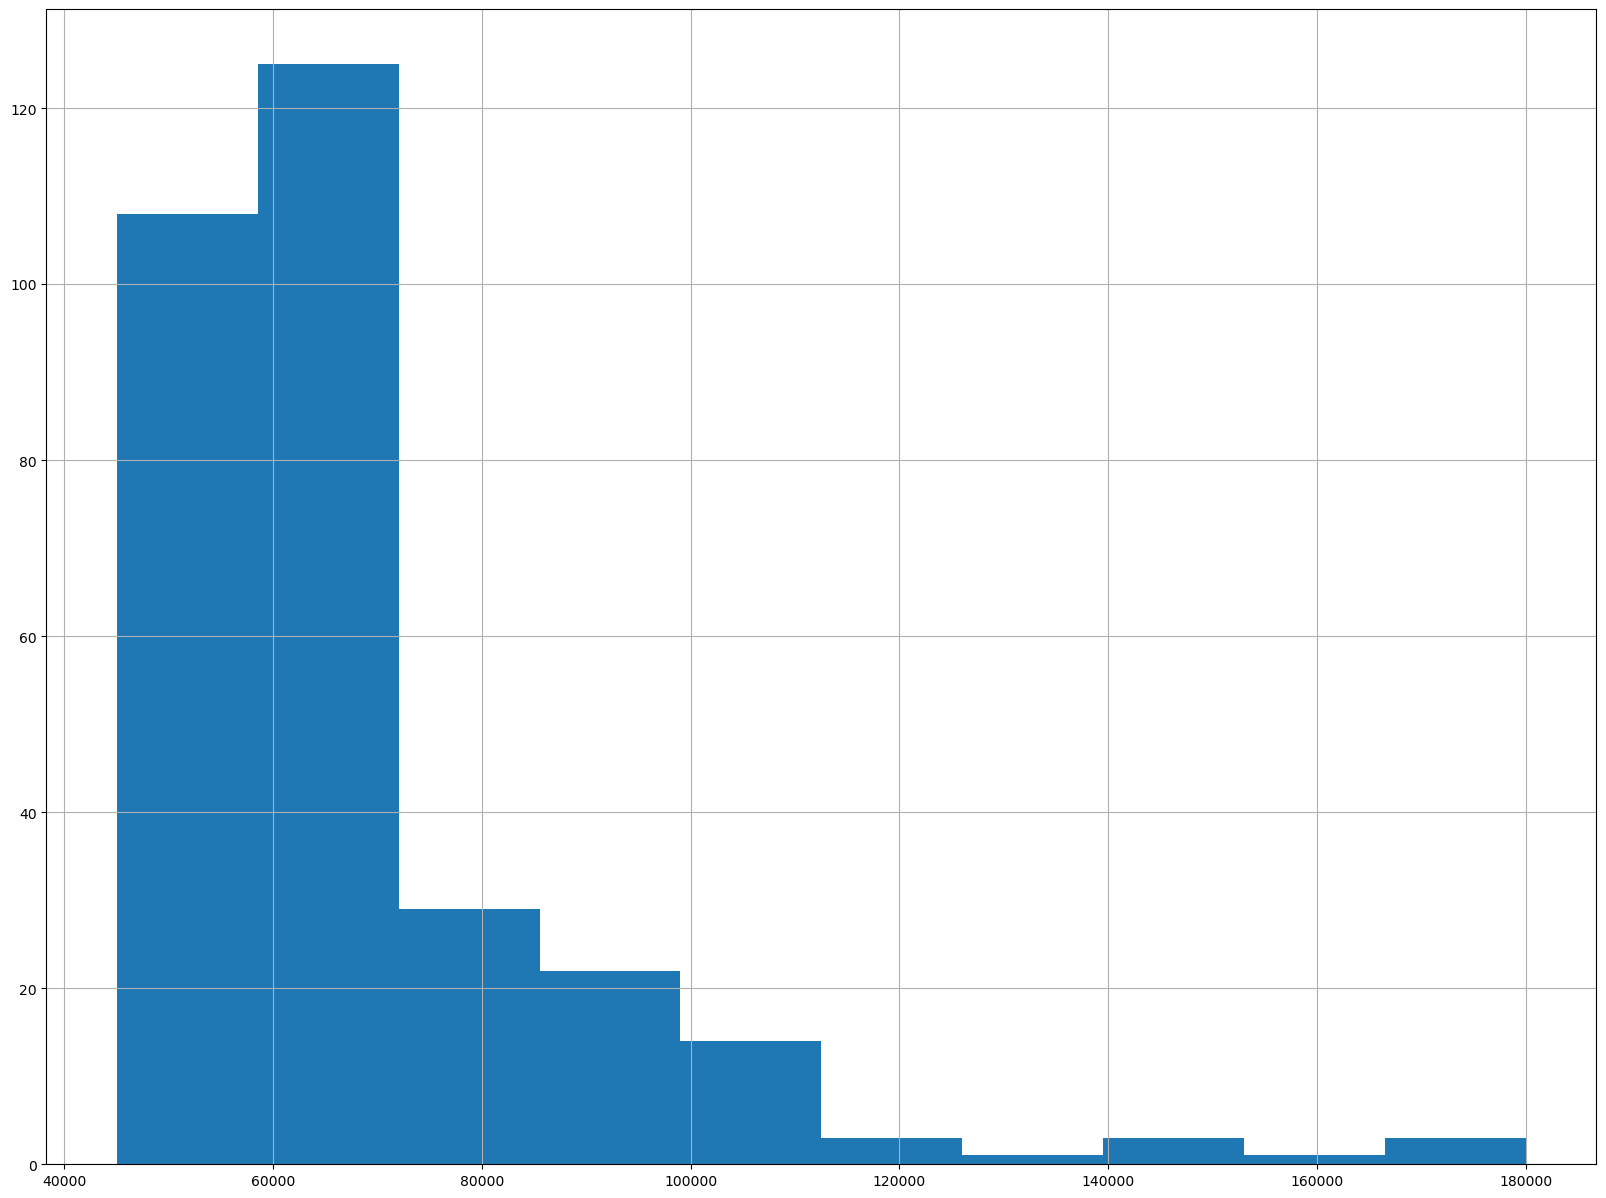

In [21]:
HR_data_set["Salary"].hist(bins=10, figsize=(20, 15))

## 6.3 Correlation Matrix

The HR data set correlation matrix illustrates pairwise relationships between variables. The matrix values vary from -1 to 1, with 1 being a perfect positive correlation between two variables, 0 representing no correlation, and -1 a perfect negative correlation.

In [22]:
correlation=HR_data_set[['EmploymentStatus', 'Salary',
       'TermReason', 'RecruitmentSource', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'DepartmentID', 'SexID', 'MaritalID',
       'EmploymentID', 'PositionID', 'PerformanceScoreID', 'Termination']].corr()

In [23]:
display(correlation)

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DepartmentID,SexID,MaritalID,EmploymentID,PositionID,PerformanceScoreID,Termination
Salary,1.000000,0.037412,0.073324,0.572780,-0.065920,0.075935,-0.475125,NaN,-0.072307,-0.030543,-0.180208,0.114084,-0.075414
EngagementSurvey,0.037412,1.000000,0.188658,0.010754,-0.584988,-0.010674,-0.030254,NaN,0.041702,-0.068559,0.089506,0.545055,-0.014074
EmpSatisfaction,0.073324,0.188658,1.000000,0.024496,-0.236175,0.071612,0.009379,NaN,-0.007071,-0.010972,-0.014293,0.299495,-0.004203
SpecialProjectsCount,0.572780,0.010754,0.024496,1.000000,-0.091602,-0.027236,-0.805358,NaN,-0.054881,-0.089779,-0.217458,0.034697,-0.145218
DaysLateLast30,-0.065920,-0.584988,-0.236175,-0.091602,1.000000,0.002820,0.098755,NaN,-0.092912,0.221886,0.005058,-0.736749,0.135171
Absences,0.075935,-0.010674,0.071612,-0.027236,0.002820,1.000000,0.005489,NaN,0.006707,0.101863,-0.057528,0.041353,0.100765
DepartmentID,-0.475125,-0.030254,0.009379,-0.805358,0.098755,0.005489,1.000000,NaN,0.017629,0.095087,0.475281,-0.028443,0.156277
SexID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalID,-0.072307,0.041702,-0.007071,-0.054881,-0.092912,0.006707,0.017629,NaN,1.000000,0.033772,0.020493,0.042918,0.064139
EmploymentID,-0.030543,-0.068559,-0.010972,-0.089779,0.221886,0.101863,0.095087,NaN,0.033772,1.000000,0.056924,-0.122100,0.933568


The following are a few interpretations that may be drawn from the matrix to aid in modeling and our comprehension of the data framework:


1- There is a significant negative correlation between **EngagementSurvey** and **DaysLateLast30** (-0.58), which means that workers who scored lower on the engagement survey are more likely to have been late in the last 30 days.


2- **EmpSatisfaction** has a moderately positive correlation with **PerformanceScoreID** (0.30), which means that workers who are happier with their jobs tend to have better performance scores.



3- **DaysLateLast30** has a substantial negative correlation (-0.74) with **PerformanceScoreID** (showing that workers who have more late days in the previous 30 days have lower performance scores).



4- **EmploymentID** shows a substantial positive correlation with **Termination** (0.93) (showing that individuals who have been employed for a longer period of time and occupy certain roles are more likely to be terminated).


5- **PerformanceScoreID** has a moderately good correlation (0.55) with **EngagementSurvey**, which suggests that workers with better engagement survey scores tend to have higher performance scores.


*The heatmap's cell colors indicate the two variables' correlation strength and direction. Darker tones of blue indicate higher positive correlations. Darker reds indicate higher correlations that are negative. Stronger correlations are darker*.


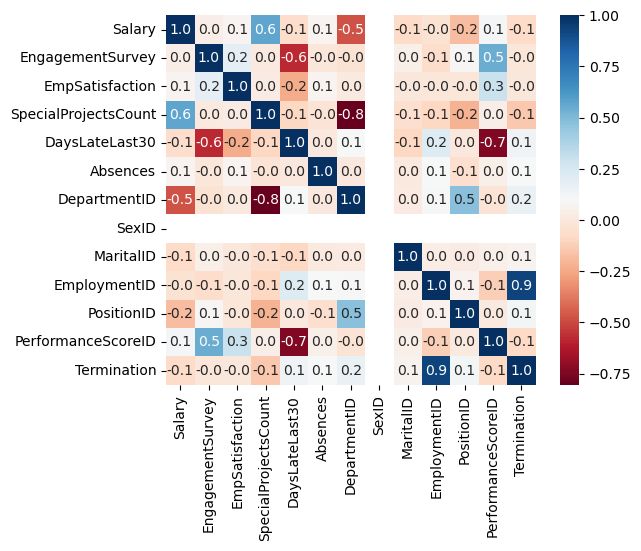

In [24]:
sns.heatmap(correlation, cmap="RdBu", fmt=".1f", square=True, linecolor="black", annot=True);

*********
# 7.Regression Model

With the help of the regression model, specifically the **Ordinary Least Squares (OLS)** method, a number of independent variables (salary, department, engagement survey results, absences, employee satisfaction, and days late to work in the previous 30 days) were modeled to explain the relationship between the dependent variable (performance score) and the independent variables. 

In [25]:
HR_data_set["Intercept"]=1

 The intercept term represents the y-value of the regression line when all predictor variables are set to 0.

<H3>The OLS Model

This code fits an OLS model to the HR dataset to predict "PerformanceScoreID" based on numerous independent factors. 

HR_data_set["Intercept"]=1 adds an intercept column.

The code then produces an independent variable X matrix and a dependent variable y variable. The X matrix contains the independent variables and the intercept column.

## 7.1 First Stage

In [27]:
import statsmodels.api as sm

# create X matrix with intercept
X = sm.add_constant(HR_data_set[["Intercept","Salary","DepartmentID","EngagementSurvey","Absences","EmpSatisfaction","DaysLateLast30"]])

# Add an intercept term
X = sm.add_constant(X)  

# create y variable
y = HR_data_set["PerformanceScoreID"]

# create OLS model
ols_model = sm.OLS(y, X)

# fit the model
results = ols_model.fit()

# print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     PerformanceScoreID   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     71.43
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.72e-55
Time:                        21:19:51   Log-Likelihood:                -136.36
No. Observations:                 309   AIC:                             286.7
Df Residuals:                     302   BIC:                             312.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.9141      0.222  

<h3>Analysis of the Model (first stage)


* The regression model is statistically significant at a very high degree of confidence, as shown by the **"Prob (F-statistic)"** score of 4.72e-55. This indicates that all of the independent variables included in the model are effective predictors of the dependent variable(McAleer, 2020). 


* The **R-squared** value of 0.587 means the independent variables explain about 58.7% of the variability in the performance score. Furthermore, the **adjusted R-squared** value is 0.578, which accounts for the number of variables in the model and provides a more precise indicator of goodness of fit(McAleer, 2020).


* Looking at the **coefficients** for each independent variable, we recognize that all variables have statistically significant coefficients demonstrating that they have a significant impact on the PerformanceScoreID, with the exception of Absences and DepartmentID (these variables do not have a statistically significant relationship with the performance score because their **P-values** are greater than 0.05). Increases in Salary, EngagementSurvey, and EmpSatisfaction have been correlated with increases in PerformanceScoreID, while increases in DaysLateLast30 are associated with decreases in PerformanceScoreID(McAleer, 2020).


* Simply put, workers with better engaged, and satisfied with their jobs, and less lateness have higher performance scores. Salary and performance scores are positively correlated, although not as strongly as other factors. 


* The significant **condition number** of 7.35e+05 suggests multicollinearity. This indicates that certain independent variables may be closely associated and duplicate information in the model, which could impact coefficient accuracy and interpretability(McAleer, 2020).



## 7.2 Scond Stage

* The statistical significance of each independent variable is indicated by the p-values in the "P>|t|" column.


**whereas:**

According to the earlier regression model analysis, the **"Absences"** variable is not statistically significant at the 5% level, with a p-value of **0.437**. In a similar way the variable **"DepartmentID"** has a large p-value of **0.055**, indicating that it is not statistically significant at the 5% level.


As a result, we could eliminate these variables from the model and re-create the regression model using just the variables that are still considered independent.

In [28]:
import statsmodels.api as sm

# create X matrix with intercept
X = sm.add_constant(HR_data_set[["Intercept","Salary","EngagementSurvey","EmpSatisfaction","DaysLateLast30"]])

# Add an intercept term
X = sm.add_constant(X) 

# create y variable
y = HR_data_set["PerformanceScoreID"]

# create OLS model
ols_model = sm.OLS(y, X)

# fit the model
results = ols_model.fit()

# print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     PerformanceScoreID   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.00e-56
Time:                        21:19:58   Log-Likelihood:                -138.63
No. Observations:                 309   AIC:                             287.3
Df Residuals:                     304   BIC:                             305.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1764      0.183  

<h3>Analysis of the Model (second stage)


* The **coefficient** for **Salary** is 1.621e-06, which means that an increase in the Salary of one unit causes an increase in **PerformanceScoreID** of 1.621e-06 units. The impact of "Salary" on "PerformanceScoreID" is not statistically significant in this model, however, since the **P-value (P>|t|) is 0.115**, which is more than the normal significance threshold of 0.05.

According to this evidence, "Salary" is probably not a statistically significant predictor of "PerformanceScoreID."



* As a result, we may take the "Salary" variable out of the model and run the regression again using the other variables. We can determine whether factors are still useful in predicting the "PerformanceScoreID" by looking at the results of the revised regression.

## 7.3 Third Stage

In [29]:
import statsmodels.api as sm

# create X matrix with intercept
X = sm.add_constant(HR_data_set[["Intercept","EngagementSurvey","EmpSatisfaction","DaysLateLast30"]])

# Add an intercept term
X = sm.add_constant(X)

# create y variable
y = HR_data_set["PerformanceScoreID"]

# create OLS model
ols_model = sm.OLS(y, X)

# fit the model
results = ols_model.fit()

# print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     PerformanceScoreID   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.08e-56
Time:                        21:20:05   Log-Likelihood:                -139.89
No. Observations:                 309   AIC:                             287.8
Df Residuals:                     305   BIC:                             302.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2793      0.171  

<h3>Analysis of the Model (third stage)

* After the "Salary" variable was eliminated, the **F-statistic** went up from 105.2 to 138.7, demonstrating that each of the other variables in the model has a more significant overall relationship with the dependent variable. After adjusting for the other factors in the model, each of the remaining variables is statistically associated with the dependent variable, as shown by the fact that all of their **p-values** are significant (less than 0.05).


* The **R-squared** value fell from 0.581 to 0.577 when the "Salary" variable was eliminated from the model, showing that the model explains somewhat less deviation in the dependent variable. fortunately, the **adjusted R-squared** value just slightly decreased from 0.575 to 0.573, indicating that the model still adequately fits the data and that the exclusion of the "Salary" variable did not substantially impact the model's overall fit.


* Overall, it seems that eliminating the "Salary" variable from the model has left us with a more condensed model that still offers a reasonable fit to the data and fully accounts for the variability in the dependent variable.

## 7.4 Conclusion for the Regression Model:

* Based on the regression analysis, the factors EngagementSurvey, EmpSatisfaction, and DaysLateLast30 are all favorable indicators of PerformanceScoreID. The R-squared for the model without the variable Salary was 0.577, which means that it explains 57.7% of the variation in PerformanceScoreID. Accordingly, these factors can be used to predict how well an employee's performance scores.

* Additionally, the coefficient estimates of the model show that an increase in EngagementSurvey and EmpSatisfaction by one unit equates to an increase in the performance score by 0.1214 and 0.0801 units, accordingly On the other hand, an increase in DaysLateLast30 by one unit results in a decrease in the performance score by 0.2761 units.

* Overall, this approach may help HR managers and business executives determine the variables that impact employee performance and implement the necessary changes that increase engagement, satisfaction, and attendance levels. It's crucial to keep in mind, however, that the model may not account for all the variables that might have an impact on employee performance.
**********


# 8.Classification Model.

## 8.1 Bayesian Classification
    

The *Bayesian classification model* has been used in order to analyze trends and variables that may have an impact on the possibility of an employee leaving their position at the firm.

The outcomes of engagement surveys, employee satisfaction, the number of days late to work in the recent 30 days, and absence are the predictors included in the model.

Naive Bayesian classification is a statistical classification approach and supervised learning methodology. The Bayes theorem is a tool for decision-making that predicts future events using knowledge of past occurrences(Guleria and Sood,2022).

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [31]:
cluster_data=HR_data_set.copy()

In [32]:
cluster_data.drop(columns=['Employee_Name', 'EmploymentStatus', 'DateofHire','TermReason', 'ManagerName', 'RecruitmentSource', 'SpecialProjectsCount', 'LastPerformanceReview_Date', 'SexID', 'MaritalID', 'EmploymentID', 'PositionID', 'Intercept'], inplace=True)

In [33]:
cluster_data.head()

,EmpID,Salary,EngagementSurvey,EmpSatisfaction,DaysLateLast30,Absences,Termination,DepartmentID,PerformanceScoreID
2,10272,180000,4.50,4,0,19,0,5,3
3,10015,178000,5.00,5,0,15,0,3,4
4,10019,170500,3.70,5,0,15,0,6,4
5,10288,157000,2.39,3,4,13,0,3,2
6,10086,150290,4.94,3,0,17,0,3,3


### 8.1.1 Data Cleaning:

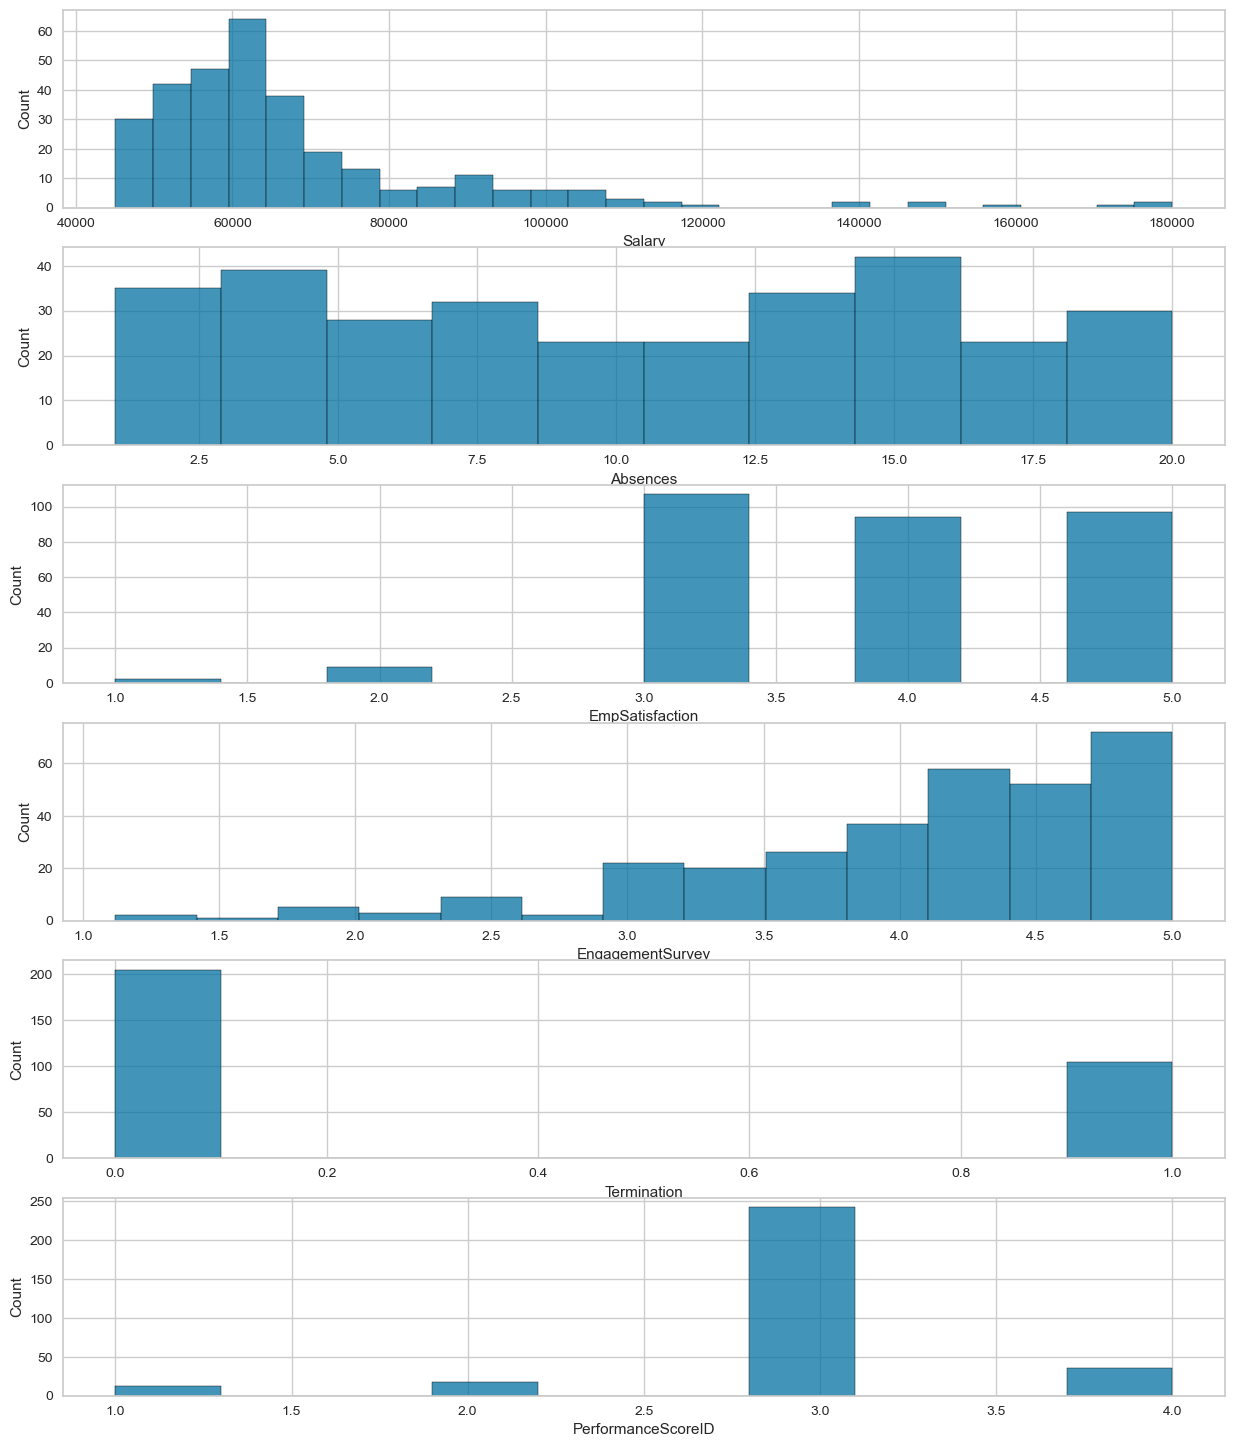

In [34]:
# We have a plot with three rows and one column, and the size of each plot is 15 x 10
f, axes = plt.subplots(6, 1, figsize=(15,18))

# Three histograms with respective alignment which axis is chosen
sns.histplot(cluster_data['Salary'], ax = axes[0])
sns.histplot(cluster_data['Absences'], ax = axes[1])
sns.histplot(cluster_data['EmpSatisfaction'], ax = axes[2])
sns.histplot(cluster_data['EngagementSurvey'], ax = axes[3])
sns.histplot(cluster_data['Termination'], ax = axes[4])
sns.histplot(cluster_data['PerformanceScoreID'], ax = axes[5]);

With the help of this code, a figure with six subplots—Salary, Absences, EmpSatisfaction, EngagementSurvey, Termination, and PerformanceScoreID— was produced. Each subplot includes a histogram of a different variable from the cluster_data data frame. 


Now we can understand the range and frequency of values for each variable and maybe detect any outliers or trends.

### 8.1.2 Data Preprocessing:

In [35]:
# First, we import the scaler package
from sklearn.preprocessing import StandardScaler

# We define that our scaler is the Standard Scaler, this is only to help us make the code cleaner
scaler = StandardScaler()

# We convert the data frame into an array with a reshaping of dimensions; transposing columns and rows
std_scaler = np.array(cluster_data)

# Now, we apply the scaler on the values
scaler.fit(std_scaler)

# At last, we store those values in a new variable
cluster_data_scaled = scaler.transform(std_scaler)

In [36]:
cluster_data_scaled .shape

(309, 9)

We adjusted the variables to have a mean of zero and a standard deviation of one by scaling the data. Because all the variables have been placed on the same scale, it is easier to compare and analyze them. Plotting the histogram of the scaled data helps us to see how the variables are distributed following the scaling process.

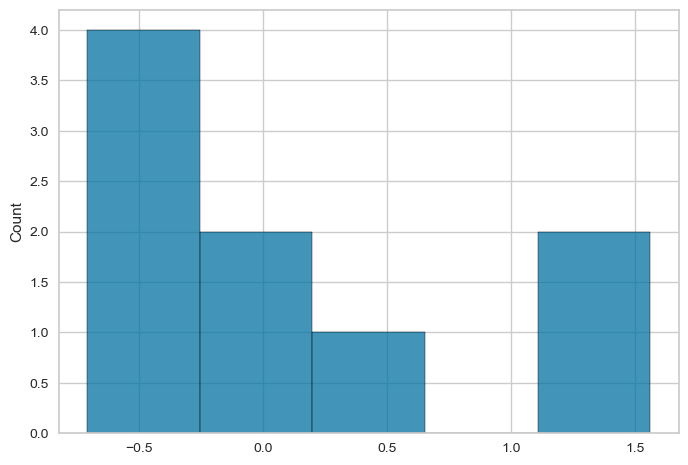

In [37]:
sns.histplot(cluster_data_scaled[20]);

### 8.1.3 Bayesian Prediction:

In this part, we estimate if an employee will **quit** the organization using a machine learning model called Multinomial Naive Bayes that takes into account variables including their **engagement survey score, employee satisfaction, number of days late, and absenteeism.**


Using a 70/30 split, we divided the data into training and testing sets to assess the model's accuracy. After training the model, it was used to predict whether employees in the testing set would leave the company..

 With the 'predict' method, we predicted the target variable(Termination), and then investigated the power of model prediction with confusion matrix.

In [38]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Select the predictor variables and target variable
predictors = ['EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'Absences']
target = 'Termination'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cluster_data[predictors], cluster_data[target], test_size=0.3, random_state=42)

# Preprocess the data by scaling the predictor variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', metric='minkowski', p=2)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6129032258064516


### 8.1.4 Interpretation of Bayesian prediction results:

* With an accuracy of 0.61, the KNN model successfully predicted the **termination** status of almost **61%** of the test set's employees.


* By comparing the expected outcomes with the actual results in the testing set, the model's accuracy was determined. A score of 0.61 was achieved, **indicating that 61% of the time the model accurately predicted probability of the  leaving the organization with an employee.**

## 8.2 Confusion Matrix

In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Select the predictor variables and target variable
predictors = ['EngagementSurvey', 'EmpSatisfaction', 'DaysLateLast30', 'Absences']
target = 'Termination'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cluster_data[predictors], cluster_data[target], test_size=0.3, random_state=42)


# Train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6129032258064516
[[52  7]
 [29  5]]


### 8.2.1 Interpretation of Confusion Matrix Results:

* **The confusion matrix** is a table that displays how accurately the model predicted whether or not an employee would be terminated. True negatives, false negatives, false positives, and true positives are the four numbers in the table.


* **True negatives (52 employees )** are workers who were successfully shown not to be fired. 
* **False negatives (7 employees)**  are the number of workers that were fired but were predicted not to be fired by the model. 
* **False positives (29 employees)** are the number of workers who had been predicted to be terminated by the model but were not. 
* **True positives (5 employees)** are the number of workers who were accurately predicted by the model to be terminated.


* In other words, the model accurately identified 5 of the 34 workers who were really terminated as terminated. However, it incorrectly identified 29 workers as terminated who were not actually terminated. The model, on the other hand, accurately recognized 52 of 59 workers who were not terminated as such. 

**Overall, the model had trouble identifying employees who were truly fired.**
*********


# 9. Comparison Algorithm:<h4>Performance of Various Models on Predicting Termination

As previously noted, the Multinomial Naive Bayes model has considerable trouble predicting employee termination, particularly those who were really terminated. 

To enhance the model's performance, we may compare with alternative models or algorithms to see whether they are able to predict employee termination more accurately. The code we gave allows us to evaluate the performance of several models using **cross-validation,** which is a method for evaluating a model's accuracy. 

**K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Logistic Regression** are the models we're comparing. We can evaluate whether a model is better at predicting employee termination by comparing their accuracy ratings using cross-validation.


KNN: mean=0.625, std=0.045
Decision Tree: mean=0.615, std=0.100
Random Forest: mean=0.588, std=0.046
Logistic Regression: mean=0.676, std=0.040


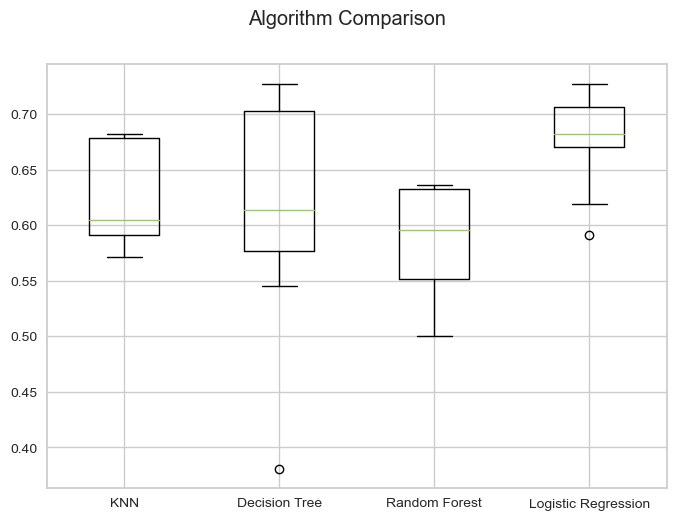

In [40]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define the models to compare
models = [
    ('KNN', knn),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression())
]

# Evaluate each model using cross-validation
results = []
names = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(scores)
    names.append(name)
    print(f'{name}: mean={np.mean(scores):.3f}, std={np.std(scores):.3f}')

# Compare the models using boxplots of the cross-validation results
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## 9.1 Conclusion for Classification Model:

K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Logistic Regression are the models that were examined. The **average performance** of models across all dataset folds is shown by the **mean accuracy**. The accuracy scores' standard deviation shows how far they differed between each fold.

The model is trained and tested ten times **(cv=10)** using various combinations of the 10 equal portions of the data. The average accuracy score across all 10 iterations is then calculated in order to assess the model's performance. With this method, the model's performance is less likely to be biased towards a specific subset of the data, and its ability to generalize performance is more accurately estimated.


Based on these outcomes, 
* **Logistic Regression** model performed consistently effectively across all folds, with the highest mean accuracy of 0.676 and the lowest standard deviation of 0.040. 
* **KNN** also exhibited respectable accuracy, with a mean of 0.625 and a standard deviation of 0.045. 
* **Decision Tree** had the biggest standard deviation of 0.119, showing that its performance varied more between the various folds of the dataset.
* **Random Forest** had lower mean accuracies of 0.597.


Overall, the **Logistic Regression model** had the lowest standard deviation and greatest mean accuracy score. As a result, we can say that with this particular dataset, the Logistic Regression model operates most effectively in predicting employee termination.
*********

# 10.Conclusion

Finally, our project has demonstrated the value of predictive analytics for assessing employee performance ratings and identifying factors that influence an employee's likelihood of termination. These insights may be significantly beneficial to managers in making data-driven decisions that improve employee retention, decrease recruitment expenses, and subsequently boost organizational performance. 

Managers may identify significant areas for enhancement of employee performance and take early actions to mitigate potential termination risks by utilizing our regression and classification models. Overall, our initiative demonstrates the worth of data analytics in improving human resource decision-making and promoting organizational success.
*********

# 11.Reference

1- Catherine, C. (2021) *4 Types of Data Analytics to Improve Decision-Making, Business Insights Blog.* Available at: https://online.hbs.edu/blog/post/types-of-data-analysis (Accessed: 4 May 2023).

2- Guleria, P. and Sood, M., 2022. *Artificial intelligence and machine learning for the healthcare sector: performing predictions and metrics evaluation of ML classifiers on a diabetic diseases data set. In Cognitive and Soft Computing Techniques for the Analysis of Healthcare Data* (pp. 1-28). Academic Press.

3- Patalano, C. and Huebner, R. (2023) *Human Resources Data Set, www.kaggle.com.* Available at: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set (Accessed: 1 May 2023).

4- McAleer, T. (2020) *‘Interpreting Linear Regression Through statsmodels .summary()’, The Startup, 14 December.* Available at: https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a (Accessed: 1 May 2023).

